In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!mkdir gender_recognition/

In [6]:
%cd gender_recognition

/content/drive/MyDrive/gender_recognition


In [7]:
!ls

female.zip  male.zip


In [12]:
#%mkdir data

In [8]:
!unzip male.zip

Archive:  male.zip
   creating: male/
  inflating: male/face_0.jpg         
  inflating: male/face_1.jpg         
  inflating: male/face_2.jpg         
  inflating: male/face_3.jpg         
  inflating: male/face_4.jpg         
  inflating: male/face_5.jpg         
  inflating: male/face_6.jpg         
  inflating: male/face_7.jpg         
  inflating: male/face_8.jpg         
  inflating: male/face_9.jpg         
  inflating: male/face_10.jpg        
  inflating: male/face_11.jpg        
  inflating: male/face_12.jpg        
  inflating: male/face_13.jpg        
  inflating: male/face_14.jpg        
  inflating: male/face_16.jpg        
  inflating: male/face_17.jpg        
  inflating: male/face_18.jpg        
  inflating: male/face_19.jpg        
  inflating: male/face_20.jpg        
  inflating: male/face_21.jpg        
  inflating: male/face_22.jpg        
  inflating: male/face_23.jpg        
  inflating: male/face_24.jpg        
  inflating: male/face_25.jpg        
  inflating:

In [9]:
!unzip female.zip

Archive:  female.zip
   creating: female/
  inflating: female/face_0.jpg       
  inflating: female/face_1.jpg       
  inflating: female/face_2.jpg       
  inflating: female/face_3.jpg       
  inflating: female/face_4.jpg       
  inflating: female/face_5.jpg       
  inflating: female/face_6.jpg       
  inflating: female/face_7.jpg       
  inflating: female/face_8.jpg       
  inflating: female/face_9.jpg       
  inflating: female/face_10.jpg      
  inflating: female/face_11.jpg      
  inflating: female/face_12.jpg      
  inflating: female/face_13.jpg      
  inflating: female/face_14.jpg      
  inflating: female/face_15.jpg      
  inflating: female/face_16.jpg      
  inflating: female/face_17.jpg      
  inflating: female/face_18.jpg      
  inflating: female/face_19.jpg      
  inflating: female/face_20.jpg      
  inflating: female/face_21.jpg      
  inflating: female/face_22.jpg      
  inflating: female/face_23.jpg      
  inflating: female/face_24.jpg      
  inflat

In [ ]:
#!pip install split-folders
#import splitfolders
#splitfolders.ratio('data', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1500 files [00:18, 80.49 files/s]


In [10]:
!pip3 install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.3 MB/s eta 0:00:00


In [11]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [15]:
img = cv.imread("/content/drive/MyDrive/gender_recognition/data/male/face_0.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

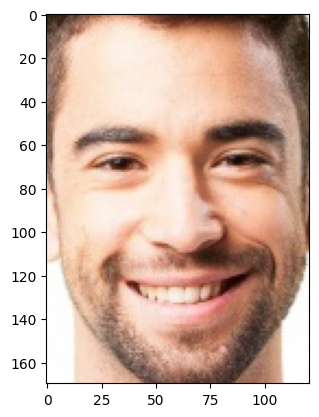

In [16]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [17]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 224ms/step


In [18]:
results

[{'box': [0, 5, 117, 167],
  'confidence': 0.9972002506256104,
  'keypoints': {'left_eye': (35, 69),
   'right_eye': (89, 67),
   'nose': (63, 104),
   'mouth_left': (32, 124),
   'mouth_right': (93, 121)}}]

In [19]:
x,y,w,h = results[0]['box']

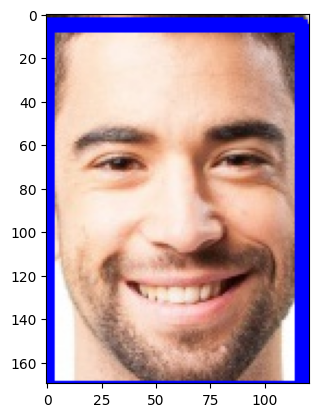

In [21]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
plt.imshow(img)

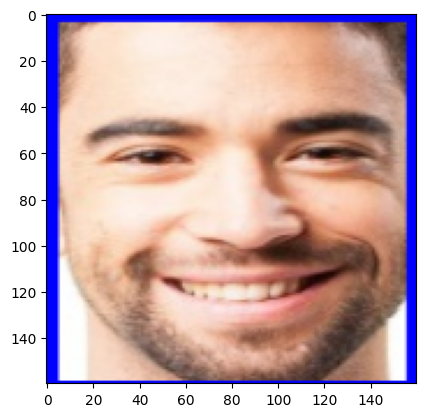

In [22]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [23]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [24]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [25]:
faceloading = FACELOADING("data")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 97ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 81ms/step
Loaded successfully: 484
1/1 [==============================] - 0s 28ms/step
Loaded successfully: 476


In [28]:
!pip3 install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) #1x160x160x3
    yhat= embedder.embeddings(face_img)
    return yhat[0]

In [30]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 35ms/step


In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
t_im = cv.imread("/content/drive/MyDrive/face_recognition/data/male/face_0.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 33ms/step


In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 29ms/step


In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [ ]:
encoder.inverse_transform(ypreds)

array(['Unknown'], dtype='<U7')

In [ ]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)